In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
img = cv2.imread('images_dataset\lionel_messi\_111066400_messi.jpg')
img.shape

(576, 1024, 3)

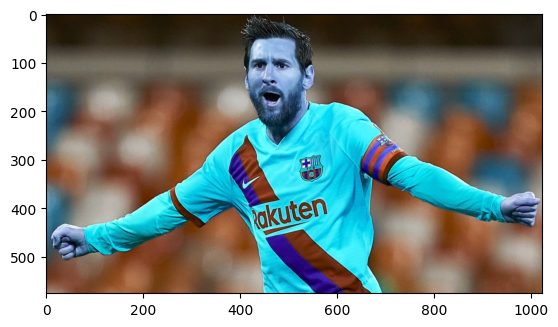

In [16]:
plt.imshow(img)

In [24]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[394,  54, 138, 138]], dtype=int32)

In [26]:
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)

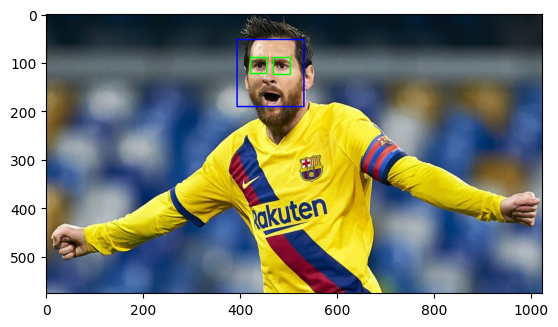

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [29]:
cropped_image = get_cropped_image_if_2_eyes('images_dataset\lionel_messi\_111066400_messi.jpg')

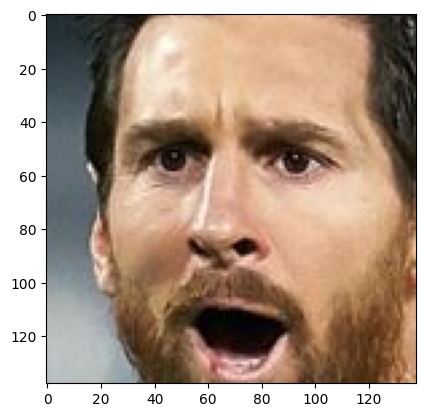

In [30]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [31]:
source_path = 'images_dataset/'
destination_path = 'images_dataset/cropped/'

In [33]:
import os
img_dirs = []
for entry in os.scandir(source_path):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['images_dataset/lionel_messi',
 'images_dataset/maria_sharapova',
 'images_dataset/roger_federer',
 'images_dataset/serena_williams',
 'images_dataset/virat_kohli']

In [34]:
import shutil
if os.path.exists(destination_path):
    shutil.rmtree(destination_path)
os.makedirs(destination_path)


In [35]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = destination_path + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  images_dataset/cropped/virat_kohli
